# Controlo PID de um sistema térmico

In [79]:
# Carregar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Controlador P

In [80]:
# definir modelo
def modelo_p(y,t,u,k,tau):
    dydt = -(y-25.0)/tau + (k/tau) * u 
    return dydt

In [81]:
# definir simulação
def sim_p(Kp,Ts,yref,y0,e,u,y,k,tau,n):
    for i in range(n-1):
        # erro
        e[i] = yref[i] -  y[i]
        
        # controlo P
        u[i] = Kp * e[i]
        
        # saturação
        if u[i] > 100.0:
            u[i] = 100.0
        if u[i] < 0.0:
            u[i] = 0.0 
            
        # simulação  
        ys = odeint(modelo_p,y0,[0,Ts],args=(u[i],k,tau))
        y0 = ys[1]; # nova cond. inicial
        
        y[i+1] = ys[1]  # guarda temp  
    
    saida = np.array([y,u,e])
    #print(y)   
    return saida

In [82]:
# parâmetros do modelo
k_p = 0.8357      # ganho
tau_p = 84.8669  # constante de tempo

# parâmetros de simulação
Ts_p = 1                     # intervalo entre amostras (período de amostragem)
tf_p = 200.0                 # tempo final
n_p = int(np.round(tf_p/Ts_p+1)) # número de amostras
t_p = np.linspace(0,tf_p,n_p)    # vetor dos tempos
kp1_p = 1                    # ganho do controlador
kp5_p = 5                    # ganho do controlador
kp10_p = 10                  # ganho do controlador
kp20_p = 20                  # ganho do controlador

# entrada de referência
yref_p = np.ones(n_p)*50 # temp = 50ºC
y0_p = 25.0            # temp inicial

# guardar/inicialização das variáveis
u_p = np.zeros(n_p)      # saída do controlador
y_p = np.ones(n_p)*y0_p  # saída do sistema (temperatura)
e_p = np.zeros(n_p)      # erro   

saida1_p = sim_p(kp1_p,Ts_p,yref_p,y0_p,e_p,u_p,y_p,k_p,tau_p,n_p)
saida5_p = sim_p(kp5_p,Ts_p,yref_p,y0_p,e_p,u_p,y_p,k_p,tau_p,n_p)
saida10_p = sim_p(kp10_p,Ts_p,yref_p,y0_p,e_p,u_p,y_p,k_p,tau_p,n_p)
saida20_p = sim_p(kp20_p,Ts_p,yref_p,y0_p,e_p,u_p,y_p,k_p,tau_p,n_p)


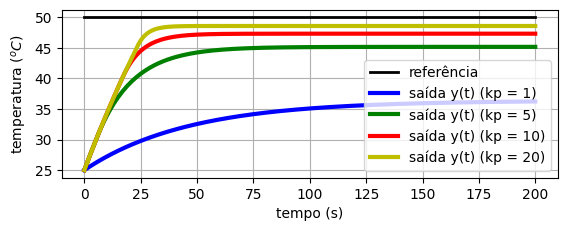

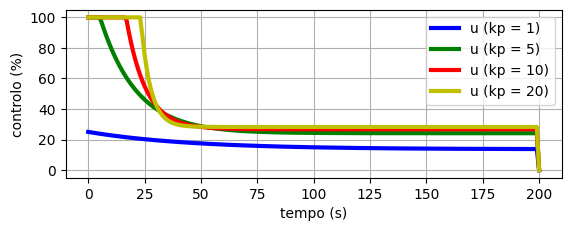

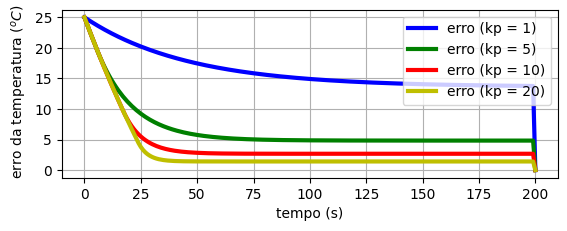

In [83]:
# gráficos
plt.figure(1)
# saída y
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_p,yref_p,'k-',linewidth=2,label='referência')
plt.plot(t_p,saida1_p[0],'b-',linewidth=3,label='saída y(t) (kp = 1)')
plt.plot(t_p,saida5_p[0],'g-',linewidth=3,label='saída y(t) (kp = 5)')
plt.plot(t_p,saida10_p[0],'r-',linewidth=3,label='saída y(t) (kp = 10)')
plt.plot(t_p,saida20_p[0],'y-',linewidth=3,label='saída y(t) (kp = 20)')
plt.ylabel('temperatura ($^oC$)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# controlo u
plt.figure(2)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_p,saida1_p[1],'b-',linewidth=3,label='u (kp = 1)')
plt.plot(t_p,saida5_p[1],'g-',linewidth=3,label='u (kp = 5)')
plt.plot(t_p,saida10_p[1],'r-',linewidth=3,label='u (kp = 10)')
plt.plot(t_p,saida20_p[1],'y-',linewidth=3,label='u (kp = 20)')
plt.ylabel('controlo (%)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# erro
plt.figure(3)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_p,saida1_p[2],'b-',linewidth=3,label='erro (kp = 1)')
plt.plot(t_p,saida5_p[2],'g-',linewidth=3,label='erro (kp = 5)')
plt.plot(t_p,saida10_p[2],'r-',linewidth=3,label='erro (kp = 10)')
plt.plot(t_p,saida20_p[2],'y-',linewidth=3,label='erro (kp = 20)')
plt.ylabel(' erro da temperatura ($^oC$)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

    Acima estão representados os gráficos relativos à simulação do sistema em malha fechada com o controlador P. Fizeram-se quatro experiencias para valores do ganho proporcional diferentes (1,5,10,20) de modo a observar as curvas de resposta em temperatura, os correspondentes sinais de controlo (u, em Duty Cycle) e a variação do erro ao longo do tempo.



Resultados do Sistema SERT: Controlador P

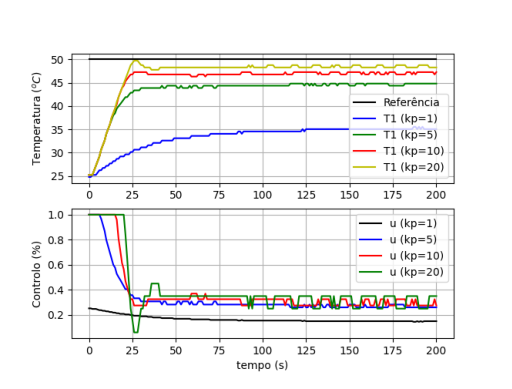

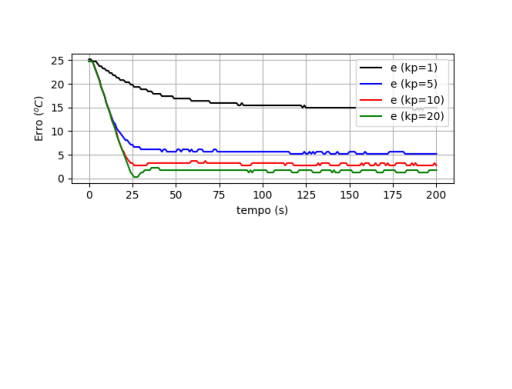

In [84]:
import matplotlib.pyplot as plt

# Load the figure
img = plt.imread('controlo_P.png')

# Display the figure
plt.imshow(img)
plt.axis('off')
plt.show()

# Load the figure
img = plt.imread('erro_P.png')

# Display the figure
plt.imshow(img)
plt.axis('off')
plt.show()


    O gráfico da resposta da temperatura apresenta um aumento de temperatura até um valor próximo da temperatura de referência, até que estabiliza em torno desse valor próximo. É evidente nos gráficos que à medida que o ganho proporcional aumenta, o valor de estabilização da temperatura aumenta, ficando mais próximo da temperatura de referência.

    O gráfico do sinal de controlo apresenta o valor máximo nos primeiros instantes, devido ao aquecimento do sistema, e desce substancialmente até estabilizar em torno de um valor. O gráfico do erro comporta-se de forma similar ao do controlo. 

    Os gráficos obtidos no sistema SERT tem algumas variações devido a oscilações do sistema provocadas por perturbações exteriores, mas no geral, os resultados obtidos são semelhantes aos simulados.

# Controlador PI

In [85]:
# definir modelo
def modelo_pi(y,t,u,k,tau,tau_d):
    dydt = -(y-25)/tau + (k/tau) * u 
    for i in range(int(t)):
        if i < tau_d:
            dydt = np.insert(dydt,0,25)
            dydt = np.resize(dydt,dydt.size - 1)
    return dydt

In [86]:
# definir simulação
def sim_pi(Kp,Ti,Ts,yref,y0,e,u,y,k,tau,tau_d,n): 
    P = 0 
    I = np.zeros(n) 

    for i in range(n-1):
        # erro
        e[i] = yref[i] -  y[i]
        
        P = Kp*e[i]

        u[i] = P + I[i]

        # saturação
        if u[i] > 100.0:
            u[i] = 100.0
        if u[i] < 0.0:
            u[i] = 0.0 
        
        I[i+1] = I[i] + e[i]*Kp*Ts/Ti

        # simulação  
        ys = odeint(modelo_pi,y0,[0,Ts],args=(u[i],k,tau,tau_d)) # [t[i],t[i+1]]
        y0 = ys[1]; # nova cond. inicial
         
        y[i+1] = ys[1]  # guarda temp  

    saida = np.array([y,u,e])

    #print(y)   
    return saida

In [87]:
# parâmetros do modelo
k_pi = 0.6136      # ganho
tau_pi = 102.9552  # constante de tempo
tau_d_pi = 16.5712 # constante de tempo de atraso

# parâmetros de simulação
Ts_pi = 1                     # intervalo entre amostras (período de amostragem)
tf_pi = 600.0                 # tempo final
n_pi = int(np.round(tf_pi/Ts_pi+1)) # número de amostras
t_pi = np.linspace(0,tf_pi,n_pi)    # vetor dos tempos
Kp_pi = 5                     # ganho do controlador
Ti20_pi = 20                  # constante de tempo integral
Ti50_pi = 50                  # constante de tempo integral
Ti100_pi = 100                # constante de tempo integral

# entrada de referência
yref_pi = np.ones(n_pi)*50 # temp = 50ºC
y0_pi = 25.0            # temp inicial

u_pi = np.zeros(n_pi)      # saída do controlador
y_pi = np.ones(n_pi)*y0_pi    # saída do sistema (temperatura)
e_pi = np.zeros(n_pi)      # erro 

saida20_pi = sim_pi(Kp_pi,Ti20_pi,Ts_pi,yref_pi,y0_pi,e_pi,u_pi,y_pi,k_pi,tau_pi,tau_d_pi,n_pi) 
saida50_pi = sim_pi(Kp_pi,Ti50_pi,Ts_pi,yref_pi,y0_pi,e_pi,u_pi,y_pi,k_pi,tau_pi,tau_d_pi,n_pi)
saida100_pi = sim_pi(Kp_pi,Ti100_pi,Ts_pi,yref_pi,y0_pi,e_pi,u_pi,y_pi,k_pi,tau_pi,tau_d_pi,n_pi) 


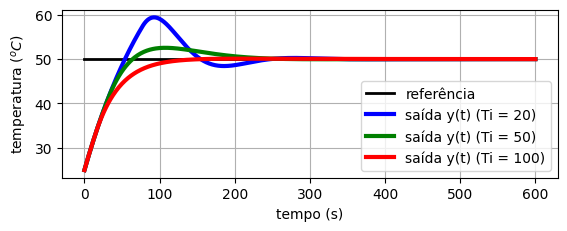

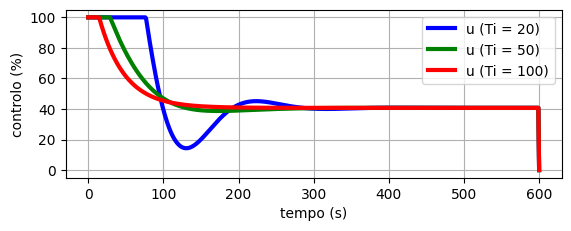

In [88]:
# gráficos
plt.figure(4)
# saída y
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_pi,yref_pi,'k-',linewidth=2,label='referência')
plt.plot(t_pi,saida20_pi[0],'b-',linewidth=3,label='saída y(t) (Ti = 20)')
plt.plot(t_pi,saida50_pi[0],'g-',linewidth=3,label='saída y(t) (Ti = 50)')
plt.plot(t_pi,saida100_pi[0],'r-',linewidth=3,label='saída y(t) (Ti = 100)')
plt.ylabel('temperatura ($^oC$)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# controlo u
plt.figure(5)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_pi,saida20_pi[1],'b-',linewidth=3,label='u (Ti = 20)')
plt.plot(t_pi,saida50_pi[1],'g-',linewidth=3,label='u (Ti = 50)')
plt.plot(t_pi,saida100_pi[1],'r-',linewidth=3,label='u (Ti = 100)')
plt.ylabel('controlo (%)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# erro
#plt.figure(6)
#ax = plt.subplot(2,1,1)
#ax.grid()
#plt.plot(t_pi,saida20_pi[2],'b-',linewidth=3,label='erro (Ti = 20)')
#plt.plot(t_pi,saida50_pi[2],'g-',linewidth=3,label='erro (Ti = 50)')
#plt.plot(t_pi,saida100_pi[2],'r-',linewidth=3,label='erro (Ti = 100)')
#plt.ylabel(' erro da temperatura ($^oC$)')
#plt.xlabel('tempo (s)')
#plt.legend(loc='best')
#plt.show()

Resultados do sistema SERT: Controlador PI

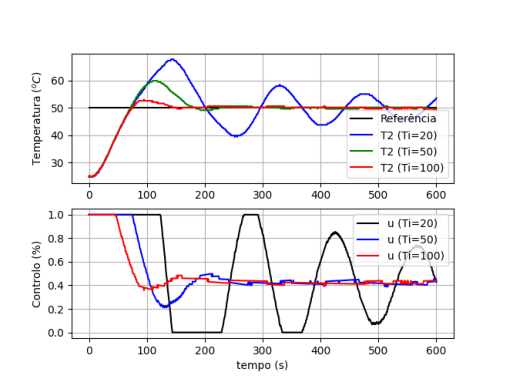

In [89]:
# Load the figure
img = plt.imread('controlo_PI.png')

# Display the figure
plt.imshow(img)
plt.axis('off')
plt.show()

    Os gráficos relativos ao controlador PI demonstram a resposta em temperatura e do controlo quer para a simulação quer para o sistema SERT. 

    É possivel observar que à medida que a resposta de temperatura estabiliza sempre em torno do valor de referencia, no entanto consegue-se constatar que aumentando a componente Ti, o sistema tende a estabilizar mais rapidamente. Repara-se que o sistema SERT demora mais tempo a estabilizar a temperatura.

    No gráfico de controlo observa-se que o sistema SERT demora mais tempo a estabilizar o controlo, no entanto, o controlo é mais suave, o que é expectável, uma vez que o sistema SERT é mais lento que a simulação.

    É também observavel que na prática para um Ti de 20, existe uma grande diferença entre os resultados da simulação e da prática. Isto deve-se ao facto de que o sistema SERT ter ambientes diferentes entre o primeiro guião e este e pelas perturbações exteriores que o sistema sofre.


# Controlador PI aplicando o método de Ziegler-Nichols

In [90]:
# definir modelo
def modelo_zn(y,t,u,k,tau,tau_d):
    dydt = -(y-25)/tau + (k/tau) * u 
    for i in range(int(t)):
        if i < tau_d:
            dydt = np.insert(dydt,0,25)
            dydt = np.resize(dydt,dydt.size - 1)
    return dydt

In [91]:
# definir simulação
def sim_zn(Kp,Ti,Ts,yref,y0,e,u,y,k,tau,tau_d,n):  
    P = 0 
    I = np.zeros(n) 

    for i in range(n-1):
        # erro
        e[i] = yref[i] -  y[i]
        
        P = Kp*e[i]

        u[i] = P + I[i]

        # saturação
        if u[i] > 100.0:
            u[i] = 100.0
        if u[i] < 0.0:
            u[i] = 0.0 
        
        I[i+1] = I[i] + e[i]*Kp*Ts/Ti

        # simulação  
        ys = odeint(modelo_zn,y0,[0,Ts],args=(u[i],k,tau,tau_d)) # [t[i],t[i+1]]
        y0 = ys[1]; # nova cond. inicial
         
        y[i+1] = ys[1]  # guarda temp  

    saida = np.array([y,u,e])

    #print(y)   
    return saida

In [92]:
# parâmetros do modelo
k_zn = 0.6136      # ganho
tau_zn = 102.9552  # constante de tempo
tau_d_zn = 16.5712 # constante de tempo de atraso

# parâmetros de simulação
Ts_zn = 1                            # intervalo entre amostras (período de amostragem)
tf_zn = 600.0                        # tempo final
n_zn = int(np.round(tf_zn/Ts_zn+1))  # número de amostras
t_zn = np.linspace(0,tf_zn,n_zn)     # vetor dos tempos
Kp_zn = (0.9*tau_zn)/(k_zn*tau_d_zn) # ganho do controlador
Ti_zn = tau_d_zn/0.3                 # constante de tempo integral

# entrada de referência
yref_zn = np.ones(n_zn)*50 # temp = 50ºC
y0_zn = 25.0               # temp inicial

u_zn = np.zeros(n_zn)      # saída do controlador
y_zn = np.ones(n_zn)*y0_zn # saída do sistema (temperatura)
e_zn = np.zeros(n_zn)      # erro 

print('Kp de Ziegler Nichols = ' + str(Kp_zn))
print('Ti de Ziegler Nichols = ' + str(Ti_zn))

saida_zn = sim_zn(Kp_zn,Ti_zn,Ts_zn,yref_zn,y0_zn,e_zn,u_zn,y_zn,k_zn,tau_zn,tau_d_zn,n_zn)


Kp de Ziegler Nichols = 9.112792600133513
Ti de Ziegler Nichols = 55.23733333333334


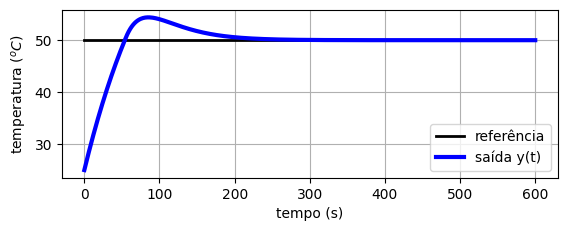

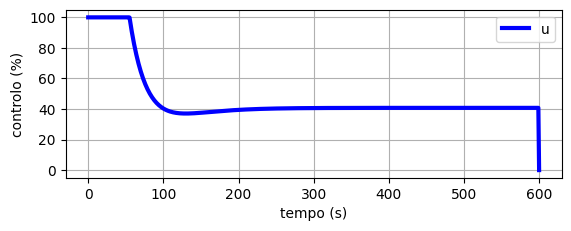

In [93]:
# gráficos

# saída y
plt.figure(7)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_zn,yref_zn,'k-',linewidth=2,label='referência')
plt.plot(t_zn,saida_zn[0],'b-',linewidth=3,label='saída y(t)')
plt.ylabel('temperatura ($^oC$)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# controlo u
plt.figure(8)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_zn,saida_zn[1],'b-',linewidth=3,label='u')
plt.ylabel('controlo (%)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# erro
#plt.figure(9)
#ax = plt.subplot(2,1,1)
#ax.grid()
#plt.plot(t_zn,saida_zn[2],'b-',linewidth=3,label='erro')
#plt.ylabel(' erro da temperatura ($^oC$)')
#plt.xlabel('tempo (s)')
#plt.legend(loc='best')
#plt.show()

    O controlador tendo em conta as constantes Kp e Ti obtidas pelo método de Ziegler-Nichols apresenta um comportamento semelhante ao controlador PI com as constantes Kp e Ti escolhidas manualmente. No entanto, o resultado obtido na simulação não era esperado devido ao método Ziegler-Nichols ser, por norma, mais oscilatório, como observárvel na prática. 

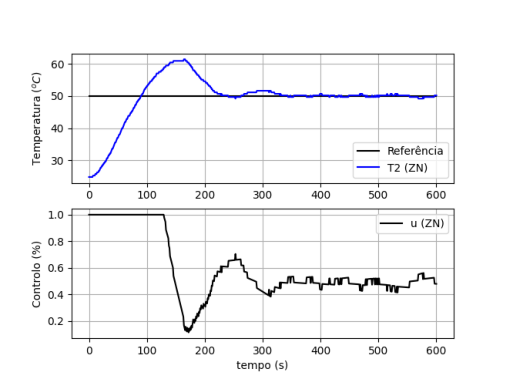

In [94]:
# Load the figure
img = plt.imread('controlo_PI_ZN.png')

# Display the figure
plt.imshow(img)
plt.axis('off')
plt.show()

# Controlador PI aplicando o método IMC

In [95]:
# definir modelo
def modelo_imc(y,t,u,k,tau,tau_d):
    dydt = -(y-25)/tau + (k/tau) * u 
    for i in range(int(t)):
        if i < tau_d:
            dydt = np.insert(dydt,0,25)
            dydt = np.resize(dydt,dydt.size - 1)
    return dydt

In [96]:
# definir simulação
def sim_imc(Kp,Ti,Ts,yref,y0,e,u,y,k,tau,tau_d,n):   
    P = 0  
    I = np.zeros(n)

    for i in range(n-1):
        # erro
        e[i] = yref[i] -  y[i]
        
        P = Kp*e[i]

        u[i] = P + I[i]

        # saturação
        if u[i] > 100.0:
            u[i] = 100.0
        if u[i] < 0.0:
            u[i] = 0.0 
        
        I[i+1] = I[i] + e[i]*Kp*Ts/Ti

        # simulação  
        ys = odeint(modelo_imc,y0,[0,Ts],args=(u[i],k,tau,tau_d)) # [t[i],t[i+1]]
        y0 = ys[1]; # nova cond. inicial
         
        y[i+1] = ys[1]  # guarda temp  

    saida = np.array([y,u,e])

    #print(y)   
    return saida

In [97]:
# parâmetros do modelo
k_imc = 0.6136      # ganho
tau_imc = 102.9552  # constante de tempo
tau_d_imc = 16.5712 # constante de tempo de atraso

# parâmetros de simulação
Ts_imc = 1                                                   # intervalo entre amostras (período de amostragem)
tf_imc = 600.0                                               # tempo final
n_imc = int(np.round(tf_imc/Ts_imc+1))                       # número de amostras
t_imc = np.linspace(0,tf_imc,n_imc)                          # vetor dos tempos
tau_c_2 = tau_imc/2
tau_c_5 = tau_imc/5 
tau_c_10 = tau_imc/10
Kp_imc_2 = (1 / k_imc) * (tau_imc / (tau_c_2 + tau_d_imc))   # ganho do controlador
Kp_imc_5 = (1 / k_imc) * (tau_imc / (tau_c_5 + tau_d_imc))   # ganho do controlador
Kp_imc_10 = (1 / k_imc) * (tau_imc / (tau_c_10 + tau_d_imc)) # ganho do controlador
Ti_imc = tau_imc                                             # constante de tempo integral

# entrada de referência
yref_imc = np.ones(n_imc)*50 # temp = 50ºC
y0_imc = 25.0               # temp inicial

u_imc = np.zeros(n_imc)      # saída do controlador
y_imc = np.ones(n_imc)*y0_imc # saída do sistema (temperatura)
e_imc = np.zeros(n_imc)      # erro 

print('Kp de IMC (tau_c = tau/2) = ' + str(Kp_imc_2))
print('Kp de IMC (tau_c = tau/5) = ' + str(Kp_imc_5))
print('Kp de IMC (tau_c = tau/10) = ' + str(Kp_imc_10))
print('Ti de IMC = ' + str(Ti_imc))

saida_imc_2 = sim_imc(Kp_imc_2,Ti_imc,Ts_imc,yref_imc,y0_imc,e_imc,u_imc,y_imc,k_imc,tau_imc,tau_d_imc,n_imc)
saida_imc_5 = sim_imc(Kp_imc_5,Ti_imc,Ts_imc,yref_imc,y0_imc,e_imc,u_imc,y_imc,k_imc,tau_imc,tau_d_imc,n_imc)
saida_imc_10 = sim_imc(Kp_imc_10,Ti_imc,Ts_imc,yref_imc,y0_imc,e_imc,u_imc,y_imc,k_imc,tau_imc,tau_d_imc,n_imc)

Kp de IMC (tau_c = tau/2) = 2.4657126574414647
Kp de IMC (tau_c = tau/5) = 4.515034278980566
Kp de IMC (tau_c = tau/10) = 6.245227831447334
Ti de IMC = 102.9552


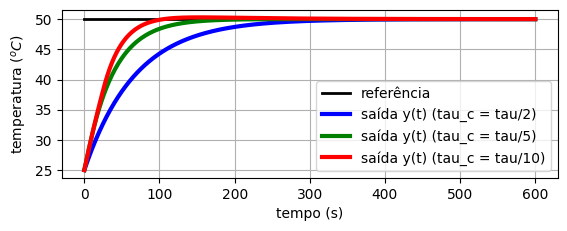

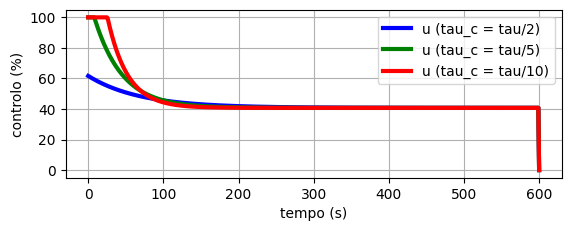

In [98]:
# gráficos

# saída y
plt.figure(10)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_imc,yref_imc,'k-',linewidth=2,label='referência')
plt.plot(t_imc,saida_imc_2[0],'b-',linewidth=3,label='saída y(t) (tau_c = tau/2)')
plt.plot(t_imc,saida_imc_5[0],'g-',linewidth=3,label='saída y(t) (tau_c = tau/5)')
plt.plot(t_imc,saida_imc_10[0],'r-',linewidth=3,label='saída y(t) (tau_c = tau/10)')
plt.ylabel('temperatura ($^oC$)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# controlo u
plt.figure(11)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_imc,saida_imc_2[1],'b-',linewidth=3,label='u (tau_c = tau/2)')
plt.plot(t_imc,saida_imc_5[1],'g-',linewidth=3,label='u (tau_c = tau/5)')
plt.plot(t_imc,saida_imc_10[1],'r-',linewidth=3,label='u (tau_c = tau/10)')
plt.ylabel('controlo (%)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# erro
#plt.figure(12)
#ax = plt.subplot(2,1,1)
#ax.grid()
#plt.plot(t_imc,saida_imc_2[2],'b-',linewidth=3,label='erro (tau_c = tau/2)')
#plt.plot(t_imc,saida_imc_5[2],'g-',linewidth=3,label='erro (tau_c = tau/5)')
#plt.plot(t_imc,saida_imc_10[2],'r-',linewidth=3,label='erro (tau_c = tau/10)')
#plt.ylabel(' erro da temperatura ($^oC$)')
#plt.xlabel('tempo (s)')
#plt.legend(loc='best')
#plt.show()

Resultados do sistema SERT: Controlador PI com IMC

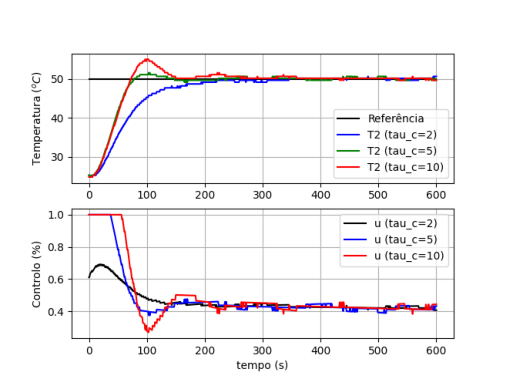

In [99]:
# Load the figure
img = plt.imread('controlo_PI_IMC.png')

# Display the figure
plt.imshow(img)
plt.axis('off')
plt.show()

        Como Kp varia enquanto Ti é constante, quão maior este é, maior torna-se o overshoot, podendo-se verificar isto quer na simulação quer na sistema SERT. No entanto, é importante notar-se que no sistema SERT, quando tau_c é maior, o que torna Kp superior, a temperatura tem uma oscilação mais acentuada que a da simulação.

# Controlador PI com  esquema anti-windup

In [100]:
# definir modelo
def modelo_aw(y,t,u,k,tau,tau_d):
    dydt = -(y-25)/tau + (k/tau) * u 
    for i in range(int(t)):
        if i < tau_d:
            dydt = np.insert(dydt,0,25)
            dydt = np.resize(dydt,dydt.size - 1)
    return dydt

In [101]:
# definir simulação
def sim_aw(Kp,Ti,Ts,yref,y0,e,u,y,k,tau,tau_d,n,Ka): 
    I = np.zeros(n)
    P = np.zeros(n)  
    v = np.zeros(n)

    for i in range(n-1):
        # erro
        e[i] = yref[i] -  y[i]
        
        P[i] = Kp*e[i]

        v[i] = P[i] + I[i]

        u[i] = v[i] 

        # saturação
        if u[i] > 100.0:
            u[i] = 100.0
        if u[i] < 0.0:
            u[i] = 0.0 
        
        I[i+1] = I[i] + e[i]*Kp*Ts/Ti + Ts*Ka*(u[i]-v[i])

        # simulação  
        ys = odeint(modelo_aw,y0,[0,Ts],args=(u[i],k,tau,tau_d)) 
        y0 = ys[1]; # nova cond. inicial
         
        y[i+1] = ys[1]  # guarda temp  

    saida = np.array([y,u,e,P, I])

    #print(y)   
    return saida

In [102]:
# parâmetros do modelo
k_aw = 0.6136      # ganho
tau_aw = 102.9552  # constante de tempo
tau_d_aw = 16.5712 # constante de tempo de atraso

# parâmetros de simulação
Ts_aw = 1                            # intervalo entre amostras (período de amostragem)
tf_aw = 600.0                        # tempo final
n_aw = int(np.round(tf_aw/Ts_aw+1))  # número de amostras
t_aw = np.linspace(0,tf_aw,n_aw)     # vetor dos tempos
Ka_02 = 0.02                         # Ka = 1/Tt
ka_1 = 0.1
ka_2 = 0.2
Kp_aw = Kp_zn                        # ganho do controlador
Ti_aw = Ti_zn                        # constante de tempo integral

# entrada de referência
yref_aw = np.ones(n_aw)*50 # temp = 50ºC
y0_aw = 25.0               # temp inicial

u_aw = np.zeros(n_aw)      # saída do controlador
y_aw = np.ones(n_aw)*y0_aw # saída do sistema (temperatura)
e_aw = np.zeros(n_aw)      # erro 

saida_aw_02 = sim_aw(Kp_aw,Ti_aw,Ts_aw,yref_aw,y0_aw,e_aw,u_aw,y_aw,k_aw,tau_aw,tau_d_aw,n_aw,Ka_02)
saida_aw_1 = sim_aw(Kp_aw,Ti_aw,Ts_aw,yref_aw,y0_aw,e_aw,u_aw,y_aw,k_aw,tau_aw,tau_d_aw,n_aw,ka_1)
saida_aw_2 = sim_aw(Kp_aw,Ti_aw,Ts_aw,yref_aw,y0_aw,e_aw,u_aw,y_aw,k_aw,tau_aw,tau_d_aw,n_aw,ka_2)

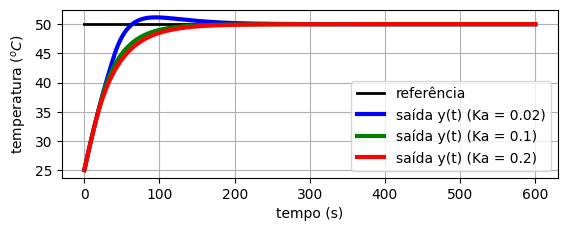

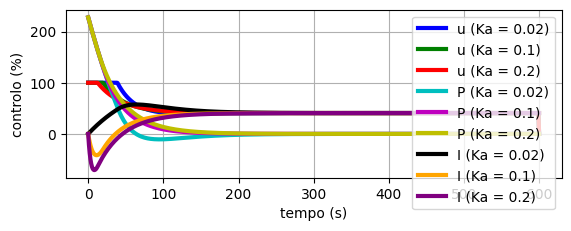

In [103]:
# gráficos

# saída y
plt.figure(13)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_aw,yref_aw,'k-',linewidth=2,label='referência')
plt.plot(t_aw,saida_aw_02[0],'b-',linewidth=3,label='saída y(t) (Ka = 0.02)')
plt.plot(t_aw,saida_aw_1[0],'g-',linewidth=3,label='saída y(t) (Ka = 0.1)')
plt.plot(t_aw,saida_aw_2[0],'r-',linewidth=3,label='saída y(t) (Ka = 0.2)')
plt.ylabel('temperatura ($^oC$)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# controlo u
plt.figure(14)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_aw,saida_aw_02[1],'b-',linewidth=3,label='u (Ka = 0.02)')
plt.plot(t_aw,saida_aw_1[1],'g-',linewidth=3,label='u (Ka = 0.1)')
plt.plot(t_aw,saida_aw_2[1],'r-',linewidth=3,label='u (Ka = 0.2)')
plt.plot(t_aw,saida_aw_02[3],'c-',linewidth=3,label='P (Ka = 0.02)')
plt.plot(t_aw,saida_aw_1[3],'m-',linewidth=3,label='P (Ka = 0.1)')
plt.plot(t_aw,saida_aw_2[3],'y-',linewidth=3,label='P (Ka = 0.2)')
plt.plot(t_aw,saida_aw_02[4],'k-',linewidth=3,label='I (Ka = 0.02)')
plt.plot(t_aw,saida_aw_1[4],'orange',linewidth=3,label='I (Ka = 0.1)')
plt.plot(t_aw,saida_aw_2[4],'purple',linewidth=3,label='I (Ka = 0.2)')
plt.ylabel('controlo (%)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

# erro
#plt.figure(15)
#ax = plt.subplot(2,1,1)
#ax.grid()
#plt.plot(t_aw,saida_aw_02[2],'b-',linewidth=3,label='erro (Ka = 0.02)')
#plt.plot(t_aw,saida_aw_1[2],'g-',linewidth=3,label='erro (Ka = 0.1)')
#plt.plot(t_aw,saida_aw_2[2],'r-',linewidth=3,label='erro (Ka = 0.2)')
#plt.ylabel(' erro da temperatura ($^oC$)')
#plt.xlabel('tempo (s)')
#plt.legend(loc='best')
#plt.show()

# P
#plt.figure(16)
#ax = plt.subplot(2,1,1)
#ax.grid()
#plt.plot(t_aw,saida_aw_02[3],'b-',linewidth=3,label='P (Ka = 0.02)')
#plt.plot(t_aw,saida_aw_1[3],'g-',linewidth=3,label='P (Ka = 0.1)')
#plt.plot(t_aw,saida_aw_2[3],'r-',linewidth=3,label='P (Ka = 0.2)')
#plt.ylabel('Variação de P')
#plt.xlabel('tempo (s)')
#plt.legend(loc='best')
#plt.show()

# I
#plt.figure(17)
#ax = plt.subplot(2,1,1)
#ax.grid()
#plt.plot(t_aw,saida_aw_02[4],'b-',linewidth=3,label='I (Ka = 0.02)')
#plt.plot(t_aw,saida_aw_1[4],'g-',linewidth=3,label='I (Ka = 0.1)')
#plt.plot(t_aw,saida_aw_2[4],'r-',linewidth=3,label='I (Ka = 0.2)')
#plt.ylabel('Variação de I')
#plt.xlabel('tempo (s)')
#plt.legend(loc='best')
#plt.show()

Resultados do Sistema SERT : Controlador PI com  esquema anti-windup

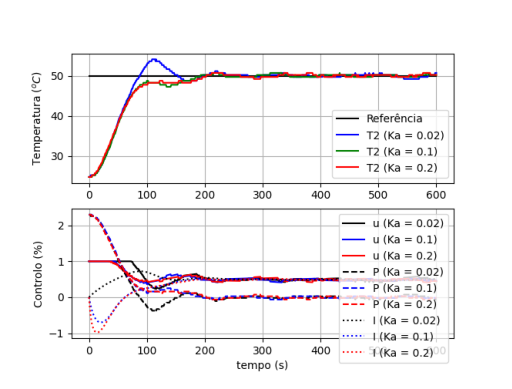

In [104]:
# Load the figure
img = plt.imread('controlo_PI_AW.png')

# Display the figure
plt.imshow(img)
plt.axis('off')
plt.show()

        Ao contrário dos outros dois modos, Ziegler-Nichols e IMC, no anti-windup, é alterada a equação do integrador. Nesta, através de uma variável Ka e com valor do controlo antes e depois da saturação, calcula-se uma nova parcela da equação do I, assim, quando o Ka é superior, quando a temperatura aproxima-se da temperatura de referência, a temperatura é "forçada" a ter um overshoot menor, ou até inexistente. Este efeito pode ser visível quer na simulação quer no sistema SERT. No entanto, é mais visível o seu efeito quando se compara com o método de Ziegler-Nichols.

# Junção dos gráfico de variação de temperatura de Ziegler-Nichols com anti-windup

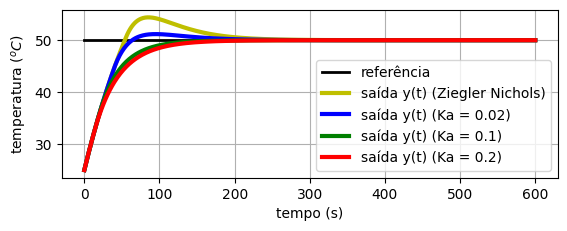

In [105]:
# saída y
plt.figure(18)
ax = plt.subplot(2,1,1)
ax.grid()
plt.plot(t_aw,yref_aw,'k-',linewidth=2,label='referência')
plt.plot(t_zn,saida_zn[0],'y-',linewidth=3,label='saída y(t) (Ziegler Nichols)')
plt.plot(t_aw,saida_aw_02[0],'b-',linewidth=3,label='saída y(t) (Ka = 0.02)')
plt.plot(t_aw,saida_aw_1[0],'g-',linewidth=3,label='saída y(t) (Ka = 0.1)')
plt.plot(t_aw,saida_aw_2[0],'r-',linewidth=3,label='saída y(t) (Ka = 0.2)')
plt.ylabel('temperatura ($^oC$)')
plt.xlabel('tempo (s)')
plt.legend(loc='best')
plt.show()

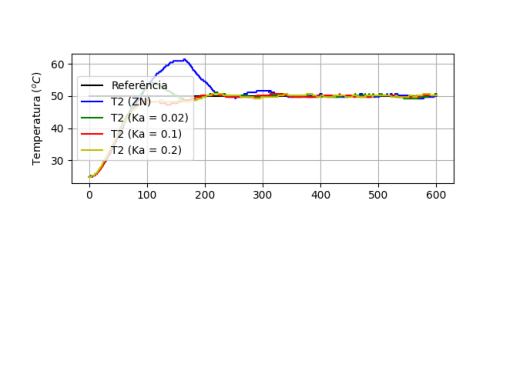

In [106]:
# Load the figure
img = plt.imread('controlo_PI_ZN_AW.png')

# Display the figure
plt.imshow(img)
plt.axis('off')
plt.show()

    Como referido no ponto anterior, nota-se uma variação evidente no sistema quando se utiliza o anti-windup quer no sistema SERT, quer na simulação. Tendo uma diferença mais notória no sistema SERT, onde o overshoot tem uma díminuição acentuada mesmo para um Ka de 0.02. 